In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.ensemble import IsolationForest

In [3]:
X = pd.read_csv('train_data.csv')
X_t = pd.read_csv('test_data.csv')
y = pd.read_csv('train_labels.csv')

In [4]:
train_data.describe()

,304.361,-436.590,-33854.769,-96571.569,-15086.947,-794.409,-442.859,304.248,-202.411,-506.852,...,95.294,-3.936,-251.812,256.429,-473.661,-1398.604,42.638,771.185,-191.123,1356.137
count,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,...,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000
mean,30.571124,9.199832,178.755026,837.059166,-182.034161,25.936548,25.042892,18.985189,14.883948,15.109637,...,13.975692,21.463356,22.659653,16.672954,14.122260,-1.053665,9.588436,-2.237489,-2.791015,37.720326
std,286.175656,213.070740,43667.290847,57108.922663,21944.043101,711.525120,898.196470,868.779430,532.786491,236.627576,...,269.255977,545.819172,265.218686,503.468371,818.895883,655.356364,204.758153,793.027599,629.205060,768.206519
min,-989.450000,-859.922000,-163336.428000,-243844.632000,-77566.109000,-2414.196000,-3227.681000,-3151.321000,-1792.781000,-794.271000,...,-957.937000,-1983.009000,-937.357000,-1758.858000,-2526.791000,-2165.769000,-739.205000,-2731.037000,-2223.909000,-2565.513000
25%,-163.862000,-135.333000,-29259.560000,-38027.475000,-14405.498000,-448.189000,-590.534000,-563.235000,-349.827000,-144.145000,...,-169.789000,-352.960000,-154.630000,-328.286000,-550.677000,-431.826000,-129.134000,-561.480000,-424.420000,-462.913000
50%,35.463000,2.744000,1208.590000,1037.514000,-147.659000,14.138000,13.895000,16.537000,9.733000,11.226000,...,18.700000,38.426000,26.220000,14.567000,1.836000,-3.789000,8.363000,-4.317000,-7.446000,27.562000
75%,215.740000,156.269000,29640.573000,40569.974000,14526.865000,507.316000,631.339000,608.810000,383.490000,179.828000,...,196.115000,396.910000,198.267000,356.267000,574.552000,425.535000,149.917000,538.809000,427.864000,552.124000
max,1224.394000,722.868000,177744.241000,215372.854000,86287.955000,2446.466000,3118.087000,2966.971000,1914.308000,803.200000,...,893.196000,2080.750000,1070.453000,1705.664000,2868.989000,2562.331000,685.176000,3123.617000,2204.527000,2664.074000


In [5]:
test_data.describe()

,179.171,102.366,-90318.459,-76354.589,-30178.335,617.269,-1282.834,-1096.950,171.635,-19.206,...,-43.192,-224.675,12.324,232.965,152.504,122.130,107.225,565.803,537.527,-60.706
count,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,...,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000
mean,6.754328,24.169314,763.900929,-862.792983,497.393799,-6.102086,-7.409699,18.980438,45.420400,5.552209,...,11.519991,33.253244,14.966339,1.432751,0.844958,27.862334,17.626726,-5.891430,1.906880,18.218705
std,279.934939,208.562307,43699.459291,57109.629071,21893.275158,713.120568,919.787042,878.582342,523.032626,228.926425,...,269.425145,545.424424,279.114130,484.239035,812.309438,668.289023,205.320833,795.662116,618.103829,778.003092
min,-1105.426000,-649.565000,-155113.836000,-184240.160000,-91291.593000,-2035.416000,-2908.191000,-2716.201000,-1637.602000,-841.328000,...,-754.360000,-2337.359000,-843.832000,-1660.371000,-3048.856000,-1897.451000,-656.654000,-2452.794000,-2080.857000,-2991.225000
25%,-176.920000,-116.749000,-27479.032000,-40655.944000,-13717.014000,-520.619000,-629.089000,-561.472000,-343.616000,-154.511000,...,-178.660000,-326.508000,-177.331000,-334.751000,-533.876000,-395.476000,-128.067000,-539.820000,-416.491000,-510.300000
50%,12.127000,20.317000,-391.499000,-393.780000,766.785000,-9.537000,40.638000,7.819000,42.789000,13.923000,...,13.026000,14.850000,19.705000,3.010000,-9.236000,26.576000,25.438000,11.396000,-1.849000,27.904000
75%,185.301000,171.577000,31332.410000,36306.490000,14653.756000,490.640000,625.637000,613.666000,406.906000,161.232000,...,200.582000,381.102000,205.328000,335.239000,573.305000,466.003000,157.342000,547.497000,422.485000,556.566000
max,1053.495000,736.906000,141244.534000,177561.749000,60844.690000,2397.488000,2987.201000,2916.440000,1765.077000,684.350000,...,1093.874000,2010.261000,914.288000,1647.605000,2444.526000,2412.412000,610.140000,2354.781000,1989.205000,2157.461000


In [6]:
df = pd.DataFrame(y.value_counts())

,0
1,
1,3374
-1,375


In [20]:
# summarize the shape of the training dataset
print(X_train.shape)
# identify outliers in the training dataset
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(X_train)
# select all rows that are not outliers
mask = yhat != -1
X_train = X_train[mask]
# summarize the shape of the updated training dataset
print(X_train.shape)

(3749, 10000)
(3374, 10000)


In [9]:
train_data.isnull().sum().sum()

0

In [10]:
test_data.isnull().sum().sum()

0

In [23]:
X_std = scaler.fit_transform(train_data)

<AxesSubplot:>

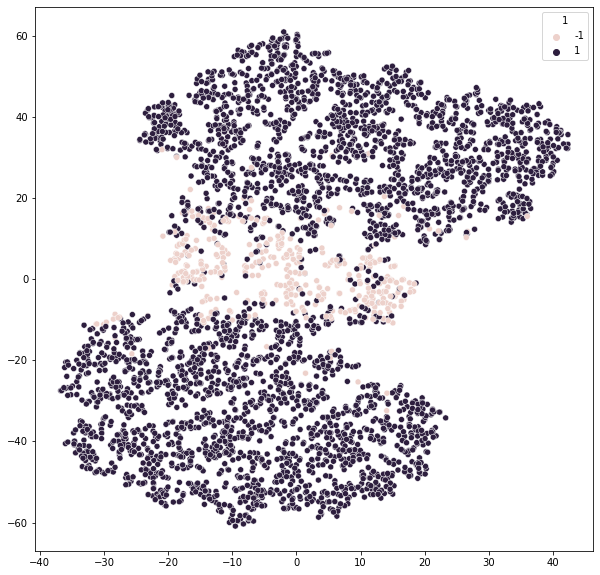

In [12]:
pca_tsne = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("tsne", TSNE(n_components=2, random_state=42,learning_rate=100, perplexity=50))
])
pca_tsne = pca_tsne.fit_transform(X)
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(x=pca_tsne[:, 0],
                y=pca_tsne[:, 1],
                legend=True,
                hue=y['1'])

<AxesSubplot:>

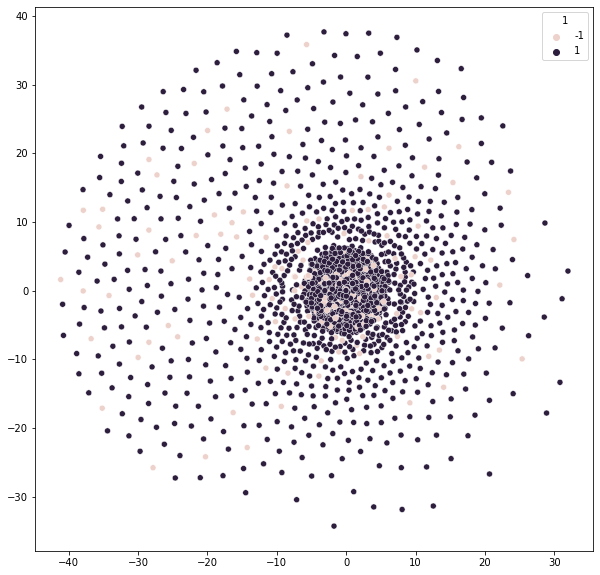

In [14]:
pca_tsne = Pipeline([
    ("ss", StandardScaler()),
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("tsne", TSNE(n_components=2, random_state=42,learning_rate=100, perplexity=50))
])
pca_tsne = pca_tsne.fit_transform(X)
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(x=pca_tsne[:, 0],
                y=pca_tsne[:, 1],
                legend=True,
                hue=y['1'])